In [1]:
import pandas as pd
import pickle
import numpy as np
import spacy
import nltk
from itertools import cycle, islice
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import datapath
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from spacy.lang.en import English
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from pandas.tools.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn import preprocessing
from mpl_toolkits import mplot3d

%matplotlib inline

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anas_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anas_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace() or token.like_url or token.orth_.startswith('@'):
            continue
#         elif token.like_url:
#             lda_tokens.append('URL')
#         elif token.orth_.startswith('@'):
#             lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
        
    return lda_tokens

We use **NLTK’s Wordnet** to find the meanings of words, synonyms, antonyms, and more. In addition, we use **WordNetLemmatizer** to get the root word.

In [3]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [4]:
en_stop = set(nltk.corpus.stopwords.words('english'))

In [5]:
#To prepare RAW text for using in LDA model
def prepare_text_for_lda(text):
    #tokenize string
    #filter all words less than length 4
    #remove stopwords
    #Replace word with its base-synonym (if any)
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma2(get_lemma(token)) for token in tokens]
    return tokens

In [6]:
data=pd.read_csv('bbc-text-classified.csv')

**Note:** Uncomment below to train and save new LDA model

In [7]:
# processed_data = []  #list of lists
# for doc in data['text']:
#     tokens = prepare_text_for_lda(doc)
#     processed_data.append(tokens)

In [8]:
#sample data
# print(processed_data[1])

In [9]:
# #create Vocabulary of corpus
# vocabulary = Dictionary(processed_data)

# #Convert data to bag-of-words [list of (tid,tf) tuples for each document]
# corpus = [vocabulary.doc2bow(text) for text in processed_data]

# #save processed corpus+vocabulary in disk for future use
# pickle.dump(corpus, open('corpus.pkl', 'wb'))
# vocabulary.save('dictionary.gensim')

In [10]:
corpus=pickle.load( open( "corpus.pkl", "rb" ))
vocabulary=Dictionary.load('dictionary.gensim')
#learn 5-topics from data
NUM_TOPICS = 5

In [13]:
# ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS,id2word=vocabulary,passes=50) #id2word=dictionary to convert tid-terms for debugging
# ldamodel.save('LdaModel.gensim')

In [14]:
#print top-15 words in each topic
ldamodel=LdaModel.load('LdaModel.gensim')
topics = ldamodel.print_topics(num_words=15)

for topic in topics:
    print(topic)

(0, '0.009*"company" + 0.008*"market" + 0.007*"price" + 0.006*"growth" + 0.006*"sale" + 0.006*"share" + 0.006*"would" + 0.005*"economy" + 0.005*"month" + 0.005*"dollar" + 0.005*"profit" + 0.005*"report" + 0.005*"expect" + 0.005*"economic" + 0.005*"china"')
(1, '0.011*"mobile" + 0.011*"people" + 0.008*"music" + 0.008*"phone" + 0.007*"service" + 0.007*"network" + 0.007*"technology" + 0.006*"user" + 0.006*"search" + 0.005*"information" + 0.005*"virus" + 0.005*"system" + 0.004*"computer" + 0.004*"online" + 0.004*"digital"')
(2, '0.009*"game" + 0.009*"award" + 0.006*"include" + 0.006*"people" + 0.006*"first" + 0.005*"phone" + 0.005*"number" + 0.005*"technology" + 0.004*"release" + 0.004*"world" + 0.004*"camera" + 0.004*"would" + 0.004*"could" + 0.003*"video" + 0.003*"chart"')
(3, '0.013*"would" + 0.009*"people" + 0.008*"party" + 0.008*"blair" + 0.008*"election" + 0.008*"labour" + 0.007*"government" + 0.007*"minister" + 0.005*"could" + 0.004*"public" + 0.004*"brown" + 0.004*"prime" + 0.004*"

By looking at the top-15 words of each topic, we can guess the label for topic:
- Topic-0 = business
- Topic-1 = tech
- Topic-2 = entertainment
- Topic-3 = politics
- Topic-4 = sport

Now, lets find label for each document:

In [15]:
header=['business','tech','entertainment','politics','sport']
data_copy=data.copy()

#### To get topic distributions for all documents

In [16]:
new_doc=prepare_text_for_lda(data_copy['text'][5])
new_doc_bow = vocabulary.doc2bow(new_doc)
ldamodel.get_document_topics(new_doc_bow)

[(2, 0.03185545), (3, 0.96567476)]

In [17]:
document_topics_distribution=[]
for doc in data_copy['text']:
    new_doc=prepare_text_for_lda(doc)
    new_doc_bow = vocabulary.doc2bow(new_doc)
    doc_score=ldamodel.get_document_topics(new_doc_bow)  #returns document topic distribution (not necessariliy for all topics)
    scores=[]
    i=0
    for s in doc_score:
        while i<s[0]:
            scores.append(0)
            i+=1
        scores.append(s[1])
        i+=1
    if i<5:
        while i<5:
            scores.append(0)
            i+=1
    document_topics_distribution.append(scores)
document_topics_distribution[:5]

[[0, 0.54273623, 0.414673, 0.04112284, 0],
 [0.51070285, 0.11302054, 0.099094726, 0.16155125, 0.115630664],
 [0, 0, 0, 0.16855289, 0.8248525],
 [0, 0, 0, 0, 0.9954707],
 [0.047573134, 0.09454406, 0.85471606, 0, 0]]

In [18]:
topics_distribution_df=pd.DataFrame(document_topics_distribution,columns=header)
topics_distribution_df.head()

,business,tech,entertainment,politics,sport
0,0.000000,0.542736,0.414673,0.041123,0.000000
1,0.510703,0.113021,0.099095,0.161551,0.115631
2,0.000000,0.000000,0.000000,0.168553,0.824853
3,0.000000,0.000000,0.000000,0.000000,0.995471
4,0.047573,0.094544,0.854716,0.000000,0.000000


#### Assign max-scored topic as document-label 

In [19]:
features=topics_distribution_df.columns
topics_distribution_df['doc_label']=topics_distribution_df.idxmax(axis=1)
topics_distribution_df.head()

,business,tech,entertainment,politics,sport,doc_label
0,0.000000,0.542736,0.414673,0.041123,0.000000,tech
1,0.510703,0.113021,0.099095,0.161551,0.115631,business
2,0.000000,0.000000,0.000000,0.168553,0.824853,sport
3,0.000000,0.000000,0.000000,0.000000,0.995471,sport
4,0.047573,0.094544,0.854716,0.000000,0.000000,entertainment


### Normalization

In [20]:
topics_distribution_df[features]=preprocessing.normalize(topics_distribution_df[features])
topics_distribution_df.head()

,business,tech,entertainment,politics,sport,doc_label
0,0.000000,0.793176,0.606020,0.060099,0.000000,tech
1,0.898768,0.198901,0.174393,0.284308,0.203494,business
2,0.000000,0.000000,0.000000,0.200206,0.979754,sport
3,0.000000,0.000000,0.000000,0.000000,1.000000,sport
4,0.055238,0.109776,0.992420,0.000000,0.000000,entertainment


In [21]:
topics_distribution_df['doc_label'].value_counts()

sport            524
politics         500
business         473
entertainment    389
tech             339
Name: doc_label, dtype: int64

In [22]:
topics_distribution_df['true_label']=data_copy.category
topics_distribution_df.to_pickle('lda_score_df.pkl')
topics_distribution_df.head()

,business,tech,entertainment,politics,sport,doc_label,true_label
0,0.000000,0.793176,0.606020,0.060099,0.000000,tech,tech
1,0.898768,0.198901,0.174393,0.284308,0.203494,business,business
2,0.000000,0.000000,0.000000,0.200206,0.979754,sport,sport
3,0.000000,0.000000,0.000000,0.000000,1.000000,sport,sport
4,0.055238,0.109776,0.992420,0.000000,0.000000,entertainment,entertainment


### Topics assignment accuracy calculation for LDA

In [23]:
## Get document-indices of documents belonging to each topic from original data
techIndex=np.array(data_copy[data_copy['category']=='tech'].index)
entertainmentIndex=np.array(data_copy[data_copy['category']=='entertainment'].index)
businessIndex=np.array(data_copy[data_copy['category']=='business'].index)
politicsIndex=np.array(data_copy[data_copy['category']=='politics'].index)
sportIndex=np.array(data_copy[data_copy['category']=='sport'].index)

#### Calculate each topic's prediction accuracy by LDA:

In [24]:
accuracy=[]
for c in range(0,5):
    #get indices of documents with label c
    if c==0:
        true_labels=data_copy.iloc[businessIndex]['category']
        predictions=topics_distribution_df.iloc[businessIndex]['doc_label']
    elif c==1:
        true_labels=data_copy.iloc[techIndex]['category']
        predictions=topics_distribution_df.iloc[techIndex]['doc_label']        
    elif c==2:
        true_labels=data_copy.iloc[entertainmentIndex]['category']
        predictions=topics_distribution_df.iloc[entertainmentIndex]['doc_label']
    elif c==3:
        true_labels=data_copy.iloc[politicsIndex]['category']
        predictions=topics_distribution_df.iloc[politicsIndex]['doc_label']
    elif c==4:
        true_labels=data_copy.iloc[sportIndex]['category']
        predictions=topics_distribution_df.iloc[sportIndex]['doc_label']

    accuracy.append(accuracy_score(true_labels,predictions))
    print('"%s" accuracy score is %f'%(header[c],accuracy[c]))
    

"business" accuracy score is 0.898039
"tech" accuracy score is 0.600998
"entertainment" accuracy score is 0.660622
"politics" accuracy score is 0.966427
"sport" accuracy score is 0.982387


#### Overall topic accuracy

In [26]:
acc_score = accuracy_score(data_copy['category'],topics_distribution_df['doc_label'])
print('Overall accuracy score is ',acc_score)

Overall accuracy score is  0.8355056179775281


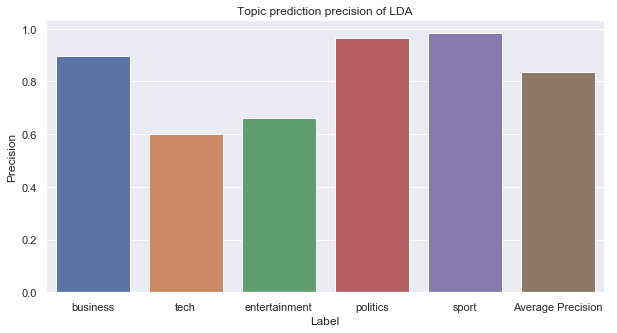

In [27]:
df=pd.DataFrame({'Label':header,'Precision':accuracy})
overall={'Label': 'Average','Precision':acc_score}
df.loc[5]=(['Average Precision',acc_score])
sns.set()
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Label',y='Precision').set_title('Topic prediction precision of LDA')
plt.show()

### Projecting to new space using Principle Component Analysis

In [28]:
#Generating PCA components for better visualization using 3D as currently we have 5 dimensions
pca = PCA(n_components=3).fit(topics_distribution_df[features])
data_3d = pca.transform(topics_distribution_df[features])

In [29]:
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[0.21782848 0.18305508 0.17283299]
[0.31989432 0.26882748 0.25381571]
[0.31989432 0.58872179 0.8425375 ]


So, these 3-dimensions cover **85%** varience of data which is very good.

Now, we will use this transformed data

### LDA Topic Prediction Visualization

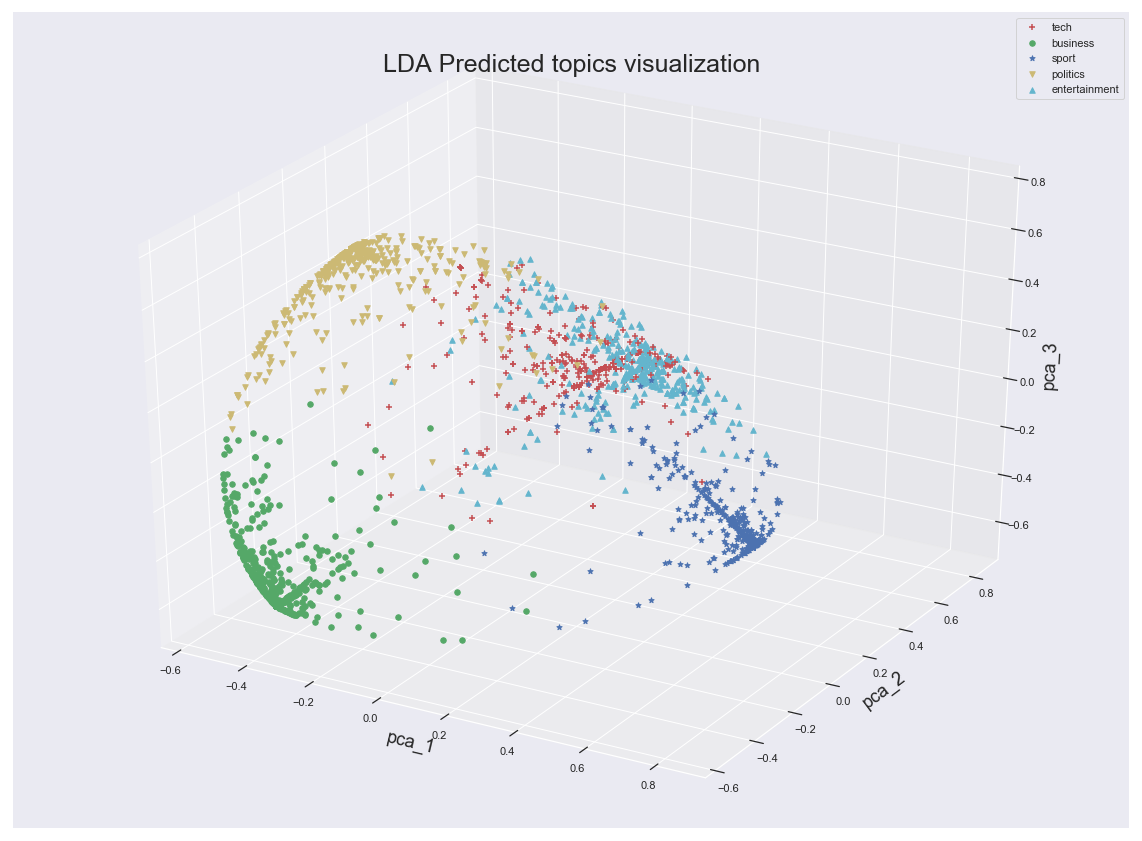

In [30]:
plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')
for i in range(0, data_3d.shape[0]):
    x=data_3d[i,0]
    y=data_3d[i,1]
    z=data_3d[i,2]
    if topics_distribution_df['doc_label'][i] == 'tech':
        c1 = ax.scatter3D(x,y,z,c='r', marker='+',s=30)
    elif topics_distribution_df['doc_label'][i] == 'business':
        c2 = ax.scatter3D(x,y,z,c='g', marker='o',s=30)
    elif topics_distribution_df['doc_label'][i] == 'sport':
        c3 = ax.scatter3D(x,y,z,c='b', marker='*',s=30)
    elif topics_distribution_df['doc_label'][i] == 'politics':
        c4 = ax.scatter3D(x,y,z,c='y', marker='v',s=30)
    elif topics_distribution_df['doc_label'][i] == 'entertainment':
        c5 = ax.scatter3D(x,y,z, c='c', marker='^',s=30)

ax.set_xlabel('pca_1', fontsize=18)        
ax.set_ylabel('pca_2', fontsize=18)        
ax.set_zlabel('pca_3', fontsize=18)        
clusters_legend=[c1,c2,c3,c4,c5]
plt.legend(clusters_legend, ['tech', 'business', 'sport', 'politics', 'entertainment'])
plt.title('LDA Predicted topics visualization', fontsize=25)
plt.show()

### Perplexity
Perplexity is a statistical measure of how well a probability model predicts a sample. As applied to LDA, for a given value of topics, you estimate the LDA model.

*A lower perplexity score indicates better generalization performance.*

It specifies the concentration of words in topic. Obviously as we increase number of topics, it generate more specific topics so perplexity decreases. So, it is not a good measure

In [32]:
topics=range(2,16,2)
perplexity_values=[]
for t in topics:
    lda=LdaModel(corpus,t)
    perplexity_values.append(lda.log_perplexity(corpus))

Text(0,0.5,'Log-Perplexity')

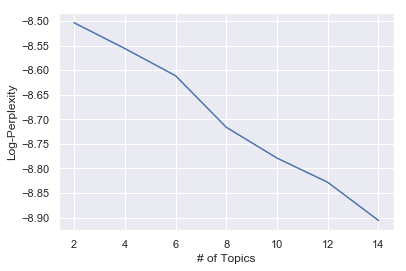

In [33]:
plt.plot(topics,perplexity_values)
plt.xlabel('# of Topics')
plt.ylabel('Log-Perplexity')

### Clustering

First, we need to find optimal number of clutsers to make. For this we are using **Elbow Method** in which we perform clustering multiple times and calculate *Sum of squared distance (SSD)* between each point and the cluster to which it belongs.

As, we increase number of topics SSD decreases and at some number the error will not reduce much significantly and graph looks like *Elbow*, we set number of topics to this elbow-point.

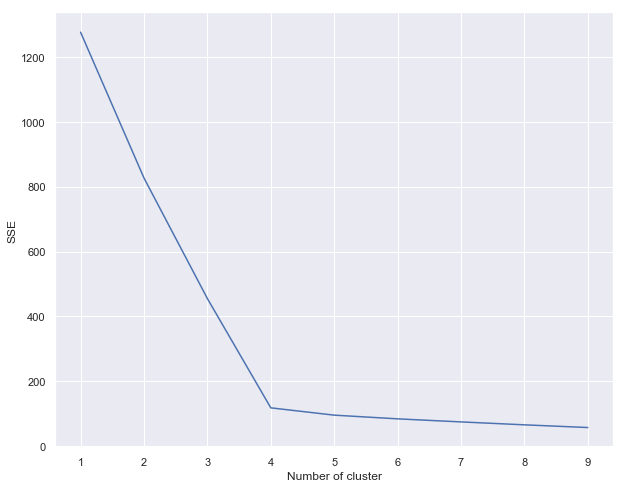

In [34]:
# data=data_3d.copy()
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=200).fit(data_3d)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center
plt.figure(figsize=(10,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

As, elbow point is 4 so, most optimal cluster count is 4.

### Clustering with 4-clusters

In [92]:
kmeans = KMeans(n_clusters=4,max_iter=200,n_init=10)
# model = kmeans.fit(topics_distribution_df[features])

clusters = kmeans.fit_predict(data_3d)
#get cluster-centeroids
centroids = kmeans.cluster_centers_

In [93]:
centroids

array([[-0.29359264, -0.22024189,  0.63125135],
       [-0.06353371,  0.58342137, -0.06039976],
       [-0.44077526, -0.38951199, -0.52295032],
       [ 0.77320761, -0.23055454, -0.03974779]])

In [94]:
#array of integers representing cluster number
clusters

array([1, 2, 3, ..., 1, 0, 3])

In [95]:
print('Clustering mean-square-error is',kmeans.inertia_)

Clustering mean-square-error is 118.36715394307339


In [96]:
#     d.append(topics_distribution_df[clusters==i]['doc_label'].value_counts().values)
names=['sport','tech','business','politics','entertainment']
clusters_distribution=pd.DataFrame()

d=[]
for i in range(0,4):
    try:
        d.append(data[clusters==i]['category'].value_counts().sport)
    except:
        d.append(0)
clusters_distribution.insert(0,column='sport',value=d)

d=[]
for i in range(0,4):
    try:
        d.append(data[clusters==i]['category'].value_counts().tech)
    except:
        d.append(0)
clusters_distribution.insert(0,column='tech',value=d)

d=[]
for i in range(0,4):
    try:
        d.append(data[clusters==i]['category'].value_counts().business)
    except:
        d.append(0)
clusters_distribution.insert(0,column='business',value=d)

d=[]
for i in range(0,4):
    try:
        d.append(data[clusters==i]['category'].value_counts().politics)
    except:
        d.append(0)
clusters_distribution.insert(0,column='politics',value=d)

d=[]
for i in range(0,4):
    try:
        d.append(data[clusters==i]['category'].value_counts().entertainment)
    except:
        d.append(0)        
clusters_distribution.insert(0,column='entertainment',value=d)

clusters_distribution.insert(0,column='cluster',value=['Cluster-0','Cluster-1','Cluster-2','Cluster-3'])
clusters_distribution.insert(1,column='total',value=clusters_distribution[features].sum(axis=1))
clusters_distribution.fillna(0,inplace=True)
clusters_distribution.head()

,cluster,total,entertainment,politics,business,tech,sport
0,Cluster-0,501,31,402,29,32,7
1,Cluster-1,718,339,3,15,360,1
2,Cluster-2,482,2,11,464,3,2
3,Cluster-3,524,14,1,2,6,501


In [97]:
x1=clusters_distribution.business.values
x2=clusters_distribution.politics.values
x3=clusters_distribution.sport.values
x4=clusters_distribution.entertainment.values
x5=clusters_distribution.tech.values
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']

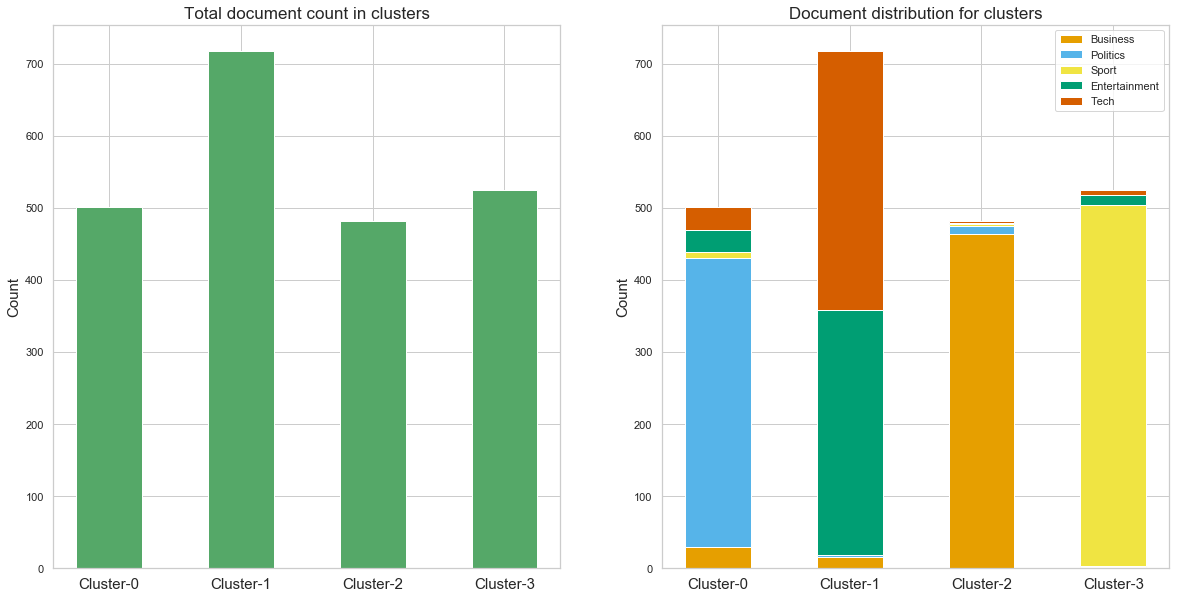

In [98]:
x=list(range(1,5))

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax.bar(x,clusters_distribution.total.values,0.5,color='g')
ax.set_xticks(x)
ax.set_xticklabels(clusters_distribution.cluster.values,fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_title('Total document count in clusters',fontsize=17)

p1=ax2.bar(x,x1,0.5,color='#E69F00')
p2=ax2.bar(x,x2,0.5,color='#56B4E9',bottom=x1)
p3=ax2.bar(x,x3,0.5,color='#F0E442',bottom=x2+x1)
p4=ax2.bar(x,x4,0.5,color='#009E73',bottom=x3+x2+x1)
p5=ax2.bar(x,x5,0.5,color='#D55E00',bottom=x4+x3+x2+x1)
ax2.legend((p1[0], p2[0],p3[0], p4[0],p5[0]), ('Business', 'Politics','Sport','Entertainment','Tech'))
ax2.set_ylabel('Count',fontsize=15)
ax2.set_title('Document distribution for clusters',fontsize=17)
ax2.set_xticks(x)
ax2.set_xticklabels(clusters_distribution.cluster.values,fontsize=15)
plt.show()

#### Intra-cluster distance-mean

For good clustering, intra-cluster distance should be minimized

In [99]:
def k_mean_distance(data,centroid_vector):
    distances = [np.linalg.norm(doc - centroid_vector) for doc in data]
    return np.mean(distances)

Text(0,0.5,'Samples mean distance')

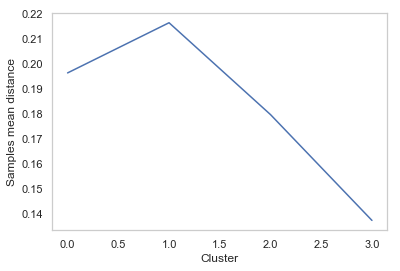

In [100]:
c_mean_distances = []
for i, centeroid_vector in enumerate(centroids):
    mean_distance = k_mean_distance(data_3d[clusters==i],centeroid_vector)
    c_mean_distances.append(mean_distance)
plt.plot(c_mean_distances)
plt.xlabel('Cluster')
plt.grid(False)
plt.ylabel('Samples mean distance')

### Centroids Visualization

In [101]:
sns.set(style='whitegrid')
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
    # A is center point object and we are appending cluster index to it
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P# Function that creates Parallel Plots

def parallel_plot(data,names):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-1,1])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')
    plt.legend(names)
    plt.title('Cluster centroids comparison along different axes')
    

In [102]:
p = pd_centers(['pca_1','pca_2','pca_3'], centroids)

In [103]:
p

,pca_1,pca_2,pca_3,prediction
0,-0.293593,-0.220242,0.631251,0
1,-0.063534,0.583421,-0.060400,1
2,-0.440775,-0.389512,-0.522950,2
3,0.773208,-0.230555,-0.039748,3


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


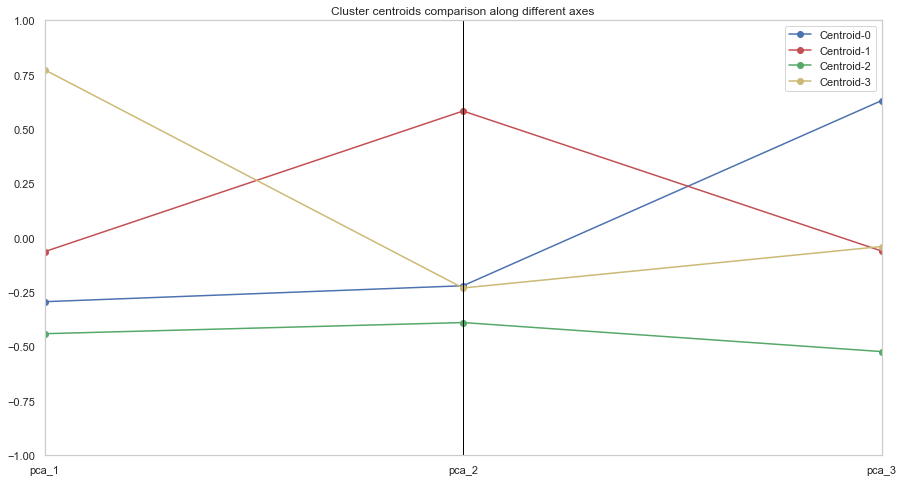

In [104]:
parallel_plot(p,['Centroid-0','Centroid-1','Centroid-2','Centroid-3'])

As, almost all lines are little apart from each-other so clustering is good.

### Clusters Visualization

C:\Anaconda3\lib\site-packages\matplotlib\legend.py:938: UserWarning: Legend does not support [<mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291A5C3EDD8>, <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291A08B6898>, <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291A5E4BD68>, <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291A6FD3518>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


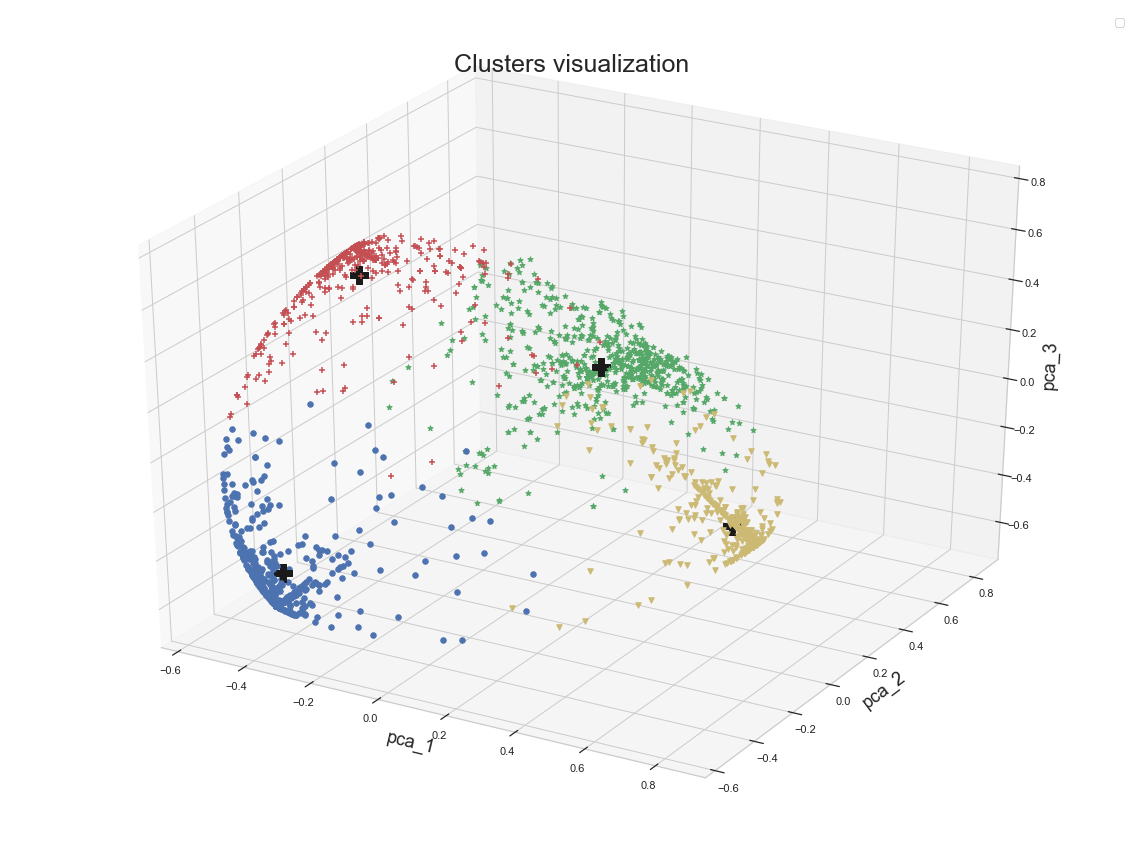

In [105]:
plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

for c in range(0,4):
    for p in data_3d[clusters==c]:
#         p=pca_3d.loc[i]
        if c==0:
            c1 = ax.scatter3D(p[0],p[1],p[2],c='r', marker='+',s=30)
        elif c==1:
            c2 = ax.scatter3D(p[0],p[1],p[2],c='g', marker='*',s=30)
        elif c==2:
            c3 = ax.scatter3D(p[0],p[1],p[2],c='b', marker='o',s=30)
        elif c==3:
            c4 = ax.scatter3D(p[0],p[1],p[2],c='y', marker='v',s=30)

#plot cluster centroids
# i=0
for c in centroids:
    centroid=ax.scatter3D(c[0],c[1],c[2],c='k', marker='P',s=350)
#     ax.annotate('Centroid'+str(i),(c[0],c[1],c[2]),(c[0]-0.2,c[1]-0.2,c[2]-0.2))
#     i=i+1

clusters_legend=[c1,c2,c3,c4]
plt.legend([clusters_legend], ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4'])
ax.set_xlabel('pca_1', fontsize=18)        
ax.set_ylabel('pca_2', fontsize=18)        
ax.set_zlabel('pca_3', fontsize=18)        
plt.title('Clusters visualization', fontsize=25)


# plt.savefig("3d_clusters4/graph.png")
plt.show()

# for ii in range(0,361,10):
#     #‘elev’ stores the elevation angle in the z plane.
#     #‘azim’ stores the azimuth angle in the x,y plane.
#     ax.view_init(elev=0., azim=ii)
#     plt.savefig("3d_clusters4/graph_%d.png" % ii)

<img src='3d_clusters4.gif' style='margin:-100px;overflow:hidden'/>

### Clustering with 5-clusters

In [106]:
kmeans = KMeans(n_clusters=5,max_iter=200,n_init=10)
# model = kmeans.fit(topics_distribution_df[features])

clusters = kmeans.fit_predict(data_3d)
#get cluster-centeroids
centroids = kmeans.cluster_centers_

In [107]:
centroids

array([[-0.29498732, -0.2574608 ,  0.65727853],
       [-0.04201463,  0.61211135, -0.1022126 ],
       [ 0.77363828, -0.23169079, -0.03957482],
       [-0.4413294 , -0.39168003, -0.52574477],
       [-0.23655403,  0.28420436,  0.27982955]])

In [108]:
#array of integers representing cluster number
clusters

array([1, 3, 2, ..., 1, 0, 2])

In [109]:
print('Clustering mean-square-error is',kmeans.inertia_)

Clustering mean-square-error is 95.85106564261909


In [110]:
#     d.append(topics_distribution_df[clusters==i]['doc_label'].value_counts().values)
names=['sport','tech','business','politics','entertainment']
clusters_distribution=pd.DataFrame()

d=[]
for i in range(0,5):
    try:
        d.append(data[clusters==i]['category'].value_counts().sport)
    except:
        d.append(0)
clusters_distribution.insert(0,column='sport',value=d)

d=[]
for i in range(0,5):
    try:
        d.append(data[clusters==i]['category'].value_counts().tech)
    except:
        d.append(0)
clusters_distribution.insert(0,column='tech',value=d)

d=[]
for i in range(0,5):
    try:
        d.append(data[clusters==i]['category'].value_counts().business)
    except:
        d.append(0)
clusters_distribution.insert(0,column='business',value=d)

d=[]
for i in range(0,5):
    try:
        d.append(data[clusters==i]['category'].value_counts().politics)
    except:
        d.append(0)
clusters_distribution.insert(0,column='politics',value=d)

d=[]
for i in range(0,5):
    try:
        d.append(data[clusters==i]['category'].value_counts().entertainment)
    except:
        d.append(0)        
clusters_distribution.insert(0,column='entertainment',value=d)

clusters_distribution.insert(0,column='cluster',value=['Cluster-0','Cluster-1','Cluster-2','Cluster-3','Cluster-4'])
clusters_distribution.insert(1,column='total',value=clusters_distribution[features].sum(axis=1))
clusters_distribution.fillna(0,inplace=True)
clusters_distribution.head()

,cluster,total,entertainment,politics,business,tech,sport
0,Cluster-0,453,15,392,22,17,7
1,Cluster-1,630,306,2,13,308,1
2,Cluster-2,523,13,1,2,6,501
3,Cluster-3,479,1,11,462,3,2
4,Cluster-4,140,51,11,11,67,0


In [111]:
x1=clusters_distribution.business.values
x2=clusters_distribution.politics.values
x3=clusters_distribution.sport.values
x4=clusters_distribution.entertainment.values
x5=clusters_distribution.tech.values
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']

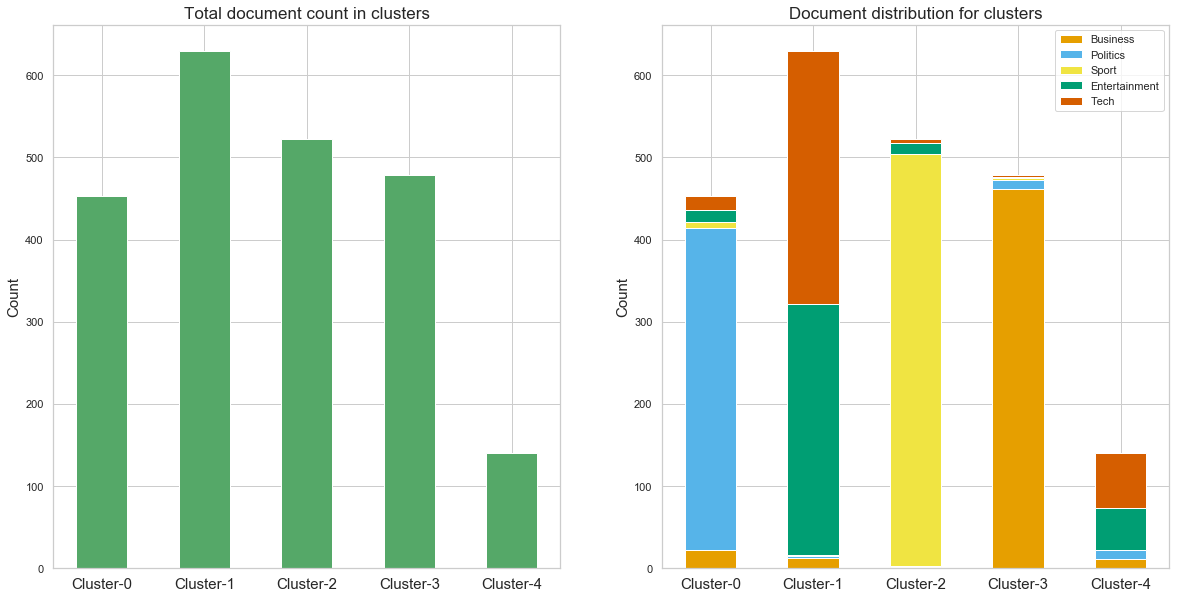

In [112]:
x=list(range(1,6))

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax.bar(x,clusters_distribution.total.values,0.5,color='g')
ax.set_xticks(x)
ax.set_xticklabels(clusters_distribution.cluster.values,fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_title('Total document count in clusters',fontsize=17)

p1=ax2.bar(x,x1,0.5,color='#E69F00')
p2=ax2.bar(x,x2,0.5,color='#56B4E9',bottom=x1)
p3=ax2.bar(x,x3,0.5,color='#F0E442',bottom=x2+x1)
p4=ax2.bar(x,x4,0.5,color='#009E73',bottom=x3+x2+x1)
p5=ax2.bar(x,x5,0.5,color='#D55E00',bottom=x4+x3+x2+x1)
ax2.legend((p1[0], p2[0],p3[0], p4[0],p5[0]), ('Business', 'Politics','Sport','Entertainment','Tech'))
ax2.set_ylabel('Count',fontsize=15)
ax2.set_title('Document distribution for clusters',fontsize=17)
ax2.set_xticks(x)
ax2.set_xticklabels(clusters_distribution.cluster.values,fontsize=15)
plt.show()

#### Intra-Cluster distance mean

In [113]:
def k_mean_distance(data,centroid_vector):
    distances = [np.linalg.norm(doc - centroid_vector) for doc in data]
    return np.mean(distances)

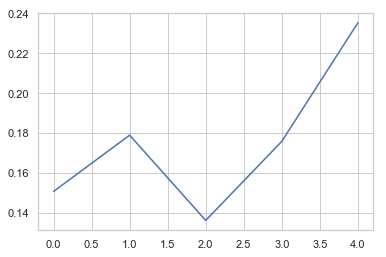

In [114]:
c_mean_distances = []
for i, centeroid_vector in enumerate(centroids):
    mean_distance = k_mean_distance(data_3d[clusters==i],centeroid_vector)
    c_mean_distances.append(mean_distance)
plt.plot(c_mean_distances)

In [115]:
p = pd_centers(['pca_1','pca_2','pca_3'], centroids)

In [116]:
p

,pca_1,pca_2,pca_3,prediction
0,-0.294987,-0.257461,0.657279,0
1,-0.042015,0.612111,-0.102213,1
2,0.773638,-0.231691,-0.039575,2
3,-0.441329,-0.391680,-0.525745,3
4,-0.236554,0.284204,0.279830,4


### Plotting clusters

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


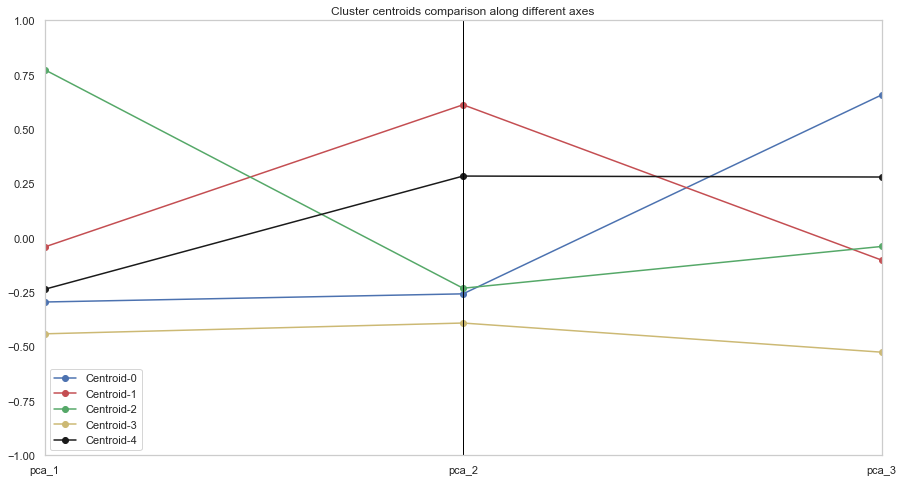

In [117]:
parallel_plot(p,['Centroid-0','Centroid-1','Centroid-2','Centroid-3','Centroid-4'])

As the lines are almost together for only pca_3 so it is a good clustering, but a little bad as compared to for 4-clusters shown above. (Also elbow graph recommended 4-clusters)

### Clusters Visualization

C:\Anaconda3\lib\site-packages\matplotlib\legend.py:938: UserWarning: Legend does not support [<mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291A97DDB38>, <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291AA11FBA8>, <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291AA5BC0B8>, <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291A6F813C8>, <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x00000291A04B7EF0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


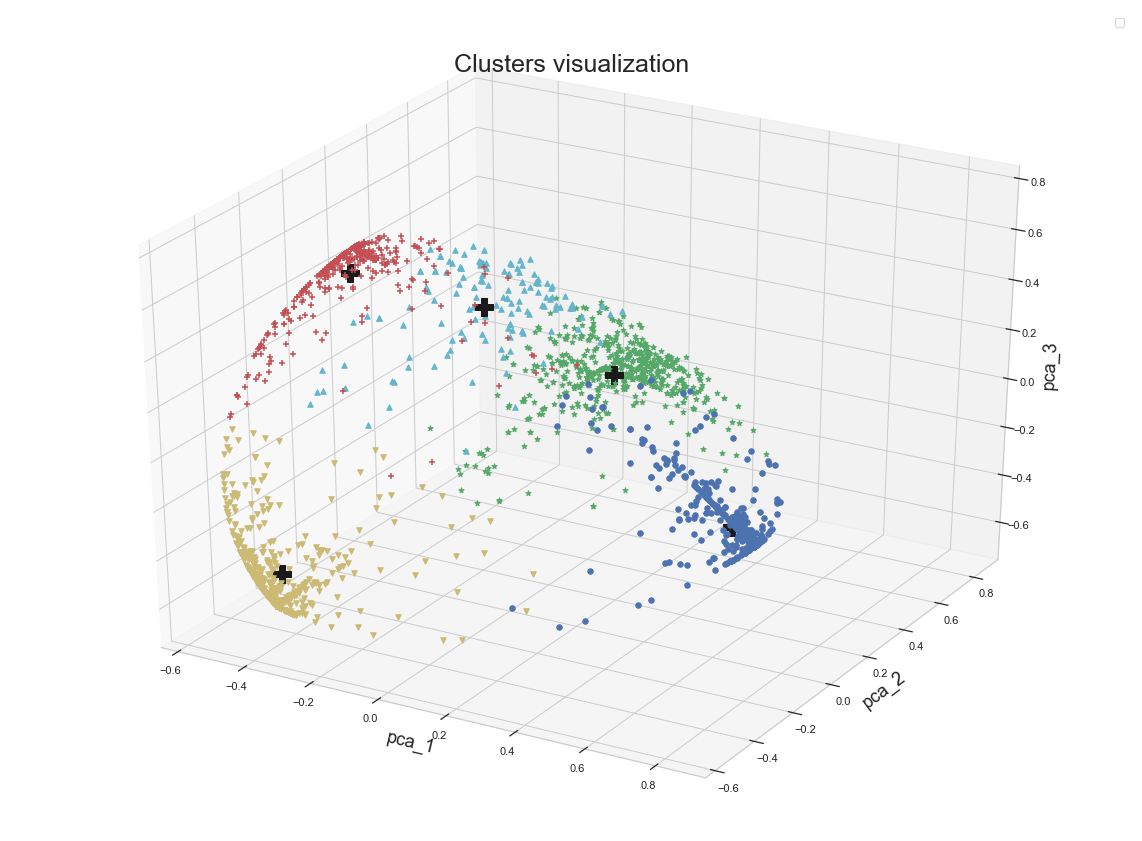

In [119]:
plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

for c in range(0,5):
    for p in data_3d[clusters==c]:
#         p=pca_3d.loc[i]
        if c==0:
            c1 = ax.scatter3D(p[0],p[1],p[2],c='r', marker='+',s=30)
        elif c==1:
            c2 = ax.scatter3D(p[0],p[1],p[2],c='g', marker='*',s=30)
        elif c==2:
            c3 = ax.scatter3D(p[0],p[1],p[2],c='b', marker='o',s=30)
        elif c==3:
            c4 = ax.scatter3D(p[0],p[1],p[2],c='y', marker='v',s=30)
        elif c==4:
            c5 = ax.scatter3D(p[0],p[1],p[2],c='c', marker='^',s=30)

#plot cluster centroids
for c in centroids:
    centroid=ax.scatter3D(c[0],c[1],c[2],c='k', marker='P',s=350)

clusters_legend=[c1,c2,c3,c4,c5]
plt.legend([clusters_legend], ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5'])
ax.set_xlabel('pca_1', fontsize=18)        
ax.set_ylabel('pca_2', fontsize=18)        
ax.set_zlabel('pca_3', fontsize=18)        
plt.title('Clusters visualization', fontsize=25)

# plt.savefig("3d_clusters5/graph.png")
plt.show()

# for ii in range(0,361,10):
#     #‘elev’ stores the elevation angle in the z plane.
#     #‘azim’ stores the azimuth angle in the x,y plane.
#     ax.view_init(elev=0., azim=ii)
#     plt.savefig("3d_clusters5/graph_%d.png" % ii)

<img src='3d_clusters5.gif' style='margin:-100px;overflow:hidden'/>